In [76]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [77]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

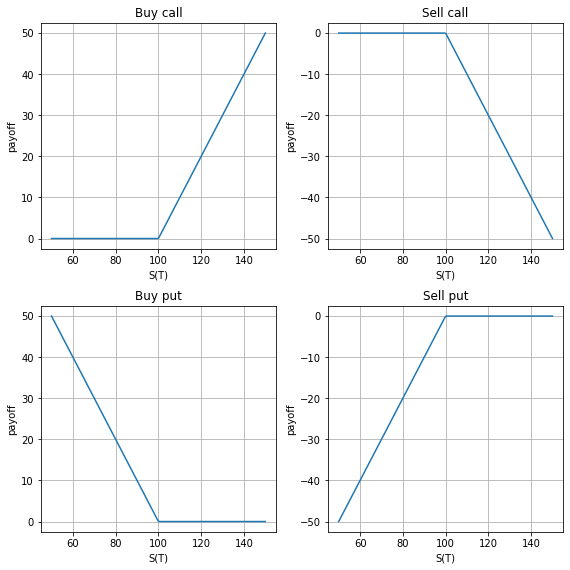

In [78]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


In [79]:
# Цена базового актива
S = 70.65

# Long put
K_long_put = 65
premium_long_put = 2

# Short call
K_short_call = 75
premium_short_call = 3.25

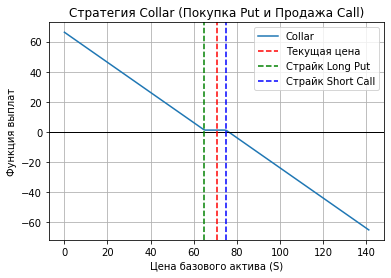

Максимальная прибыль: 11.25
Максимальные потери: -1.25
Интервал безубыточности: (67, 71.75)


In [80]:
# Функции выплат для Collar стратегии
def payoff_collar(S, K_long_put, K_short_call, premium_long_put, premium_short_call):
    payoff_put = np.maximum(K_long_put - S, 0) - premium_long_put
    payoff_call = np.maximum(S - K_short_call, 0) - premium_short_call
    return payoff_put - payoff_call

# Цены актива от 0 до 2x
S_vals = np.linspace(0, 2*S, 200)

# График функции выплат для Collar
payoffs = payoff_collar(S_vals, K_long_put, K_short_call, premium_long_put, premium_short_call)

plt.plot(S_vals, payoffs, label="Collar")
plt.axhline(0, color='black', lw=1)
plt.axvline(S, color='red', linestyle='--', label="Текущая цена")
plt.axvline(K_long_put, color='green', linestyle='--', label="Страйк Long Put")
plt.axvline(K_short_call, color='blue', linestyle='--', label="Страйк Short Call")
plt.xlabel("Цена базового актива (S)")
plt.ylabel("Функция выплат")
plt.title("Стратегия Collar (Покупка Put и Продажа Call)")
plt.legend()
plt.grid(True)
plt.show()

# Максимальная прибыль, потери и безубыточность
max_profit = np.maximum(K_short_call - K_long_put, 0) - (premium_long_put - premium_short_call)
max_loss = premium_long_put - premium_short_call
breakeven_low = K_long_put + premium_long_put
breakeven_high = K_short_call - premium_short_call

print(f"Максимальная прибыль: {max_profit}")
print(f"Максимальные потери: {max_loss}")
print(f"Интервал безубыточности: ({breakeven_low}, {breakeven_high})")


## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

In [81]:
# Цена базового актива
S = 172.5

# Long put
K_long_put = 200
premium_long_put = 29.25

# Long call
K_long_call = 200
premium_long_call = 0.04

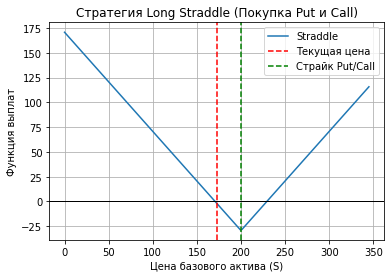

Максимальная прибыль: inf
Максимальные потери: 29.29
Интервал безубыточности: (170.71, 229.29)


In [82]:
def payoff_straddle(S, K_long_put, K_long_call, premium_long_put, premium_long_call):
    payoff_put = np.maximum(K_long_put - S, 0) - premium_long_put
    payoff_call = np.maximum(S - K_long_call, 0) - premium_long_call
    return payoff_put + payoff_call

# Цены актива от 0 до 2x
S_vals = np.linspace(0, 2*S, 200)

# График функции выплат для Long Straddle
payoffs = payoff_straddle(S_vals, K_long_put, K_long_call, premium_long_put, premium_long_call)

plt.plot(S_vals, payoffs, label="Straddle")
plt.axhline(0, color='black', lw=1)
plt.axvline(S, color='red', linestyle='--', label="Текущая цена")
plt.axvline(K_long_put, color='green', linestyle='--', label="Страйк Put/Call")
plt.xlabel("Цена базового актива (S)")
plt.ylabel("Функция выплат")
plt.title("Стратегия Long Straddle (Покупка Put и Call)")
plt.legend()
plt.grid(True)
plt.show()

# Максимальная прибыль, потери и безубыточность
max_profit = np.inf  # Теоретически неограниченная прибыль
max_loss = premium_long_put + premium_long_call
breakeven_low = K_long_put - (premium_long_put + premium_long_call)
breakeven_high = K_long_put + (premium_long_put + premium_long_call)

print(f"Максимальная прибыль: {max_profit}")
print(f"Максимальные потери: {max_loss}")
print(f"Интервал безубыточности: ({breakeven_low}, {breakeven_high})")

# Биноминальная модель

In [83]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [84]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


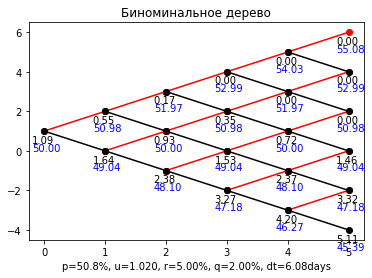

1.0853174417962133

In [85]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





Биноминальное дерево, европейский опцион колл, функция выплат max(S-K, 0)


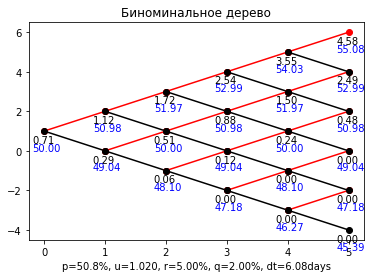

0.7120324211650718

In [86]:
print("Биноминальное дерево, европейский опцион колл, функция выплат max(S-K, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S-K,0), american=False, showStatePrices=True)


Биноминальное дерево, американского опциона пут, функция выплат max(K-S, 0)


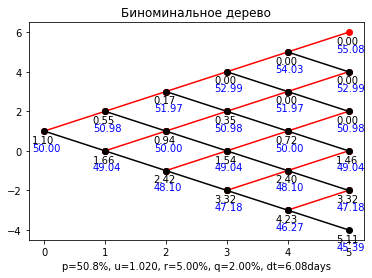

1.0962783164249443

In [87]:
print("Биноминальное дерево, американского опциона пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=True, showStatePrices=True)

Биноминальное дерево, американского опциона колл, функция выплат max(S-K, 0)


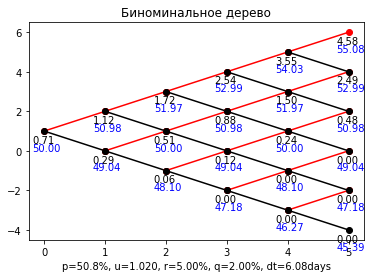

0.7120324211650718

In [88]:
print("Биноминальное дерево, американского опциона колл, функция выплат max(S-K, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(S-K,0), american=True, showStatePrices=True)


# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [89]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [90]:
# Модель Блэка-Шоулза
def call(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [91]:

call_price = call(S0, K, T, sigma, r, q)
put_price = put(S0, K, T, sigma, r, q)
put_price_paritet = put_paritet(S0, K, T, sigma, r, q)




In [92]:
print(f"Оценка опциона колл: {call_price}")
print(f"Оценка опциона пут: {put_price}")
print(f"Оценка опциона пут с использованием паритета: {put_price_paritet}")

Оценка опциона колл: 15.210500635727158
Оценка опциона пут: 8.449882626321987
Оценка опциона пут с использованием паритета: 8.44988262632198


In [93]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [94]:
# Греческие характеристики

# Delta
def delta(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.cdf(d1)

# Gamma
def gamma(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Theta
def theta(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = - (S * np.exp(-q * T) * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r * T) * norm.cdf(d2)
    term3 = q * S * np.exp(-q * T) * norm.cdf(d1)
    return term1 + term2 - term3

# Vega
def vega(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

# Рho (для колл-опциона)
def rho(S, K, T, sigma, r, q):
    d2 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T)) - sigma * np.sqrt(T)
    return K * T * np.exp(-r * T) * norm.cdf(d2)

# Пример вычисления греческих характеристик
delta_val = delta(S0, K, T, sigma, r, q)
gamma_val = gamma(S0, K, T, sigma, r, q)
theta_val = theta(S0, K, T, sigma, r, q)
vega_val = vega(S0, K, T, sigma, r, q)
rho_val = rho(S0, K, T, sigma, r, q)

print(f"Delta: {delta_val}")
print(f"Gamma: {gamma_val}")
print(f"Theta: {theta_val}")
print(f"Vega: {vega_val}")
print(f"Rho: {rho_val}")


Delta: 0.6492636865167812
Gamma: 0.012356066312812847
Theta: -2.0801190796492137
Vega: 37.06819893843854
Rho: 49.71586801595096


Графики зависимости греческих характеристик для опционов от цены базового актива.

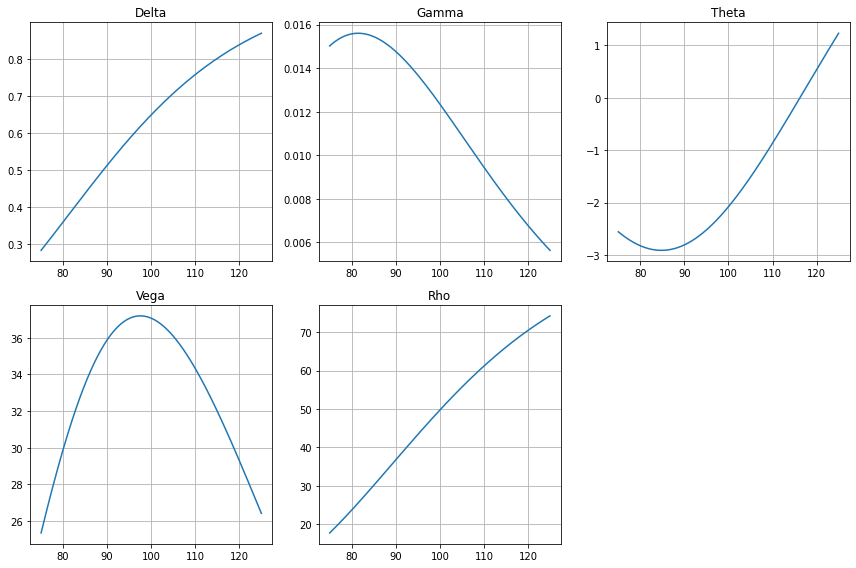

In [95]:

# Графики греческих характеристик

N = 1000
x_data = np.linspace(S0 - S0/4, S0 + S0/4, N)

delta_data = np.array([delta(x, K, T, sigma, r, q) for x in x_data])
gamma_data = np.array([gamma(x, K, T, sigma, r, q) for x in x_data])
theta_data = np.array([theta(x, K, T, sigma, r, q) for x in x_data])
vega_data = np.array([vega(x, K, T, sigma, r, q) for x in x_data])
rho_data = np.array([rho(x, K, T, sigma, r, q) for x in x_data])

# Подготовка графиков
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x_data, delta_data, label="Delta")
plt.title("Delta")
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x_data, gamma_data, label="Gamma")
plt.title("Gamma")
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x_data, theta_data, label="Theta")
plt.title("Theta")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x_data, vega_data, label="Vega")
plt.title("Vega")
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x_data, rho_data, label="Rho")
plt.title("Rho")
plt.grid(True)

plt.tight_layout()
plt.show()


Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




In [96]:
# Численные производные

def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)

# Численный расчет греческих характеристик

def delta_num(S, K, T, sigma, r, q):
    return first_derivative(lambda S: call(S, K, T, sigma, r, q), S)

def gamma_num(S, K, T, sigma, r, q):
    return second_derivative(lambda S: call(S, K, T, sigma, r, q), S)

# Пример численного вычисления
delta_num_val = delta_num(S0, K, T, sigma, r, q)
gamma_num_val = gamma_num(S0, K, T, sigma, r, q)

print(f"Численный Delta: {delta_num_val}")
print(f"Численный Gamma: {gamma_num_val}")


Численный Delta: 0.6492636864727785
Численный Gamma: 0.012356089484910626


Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

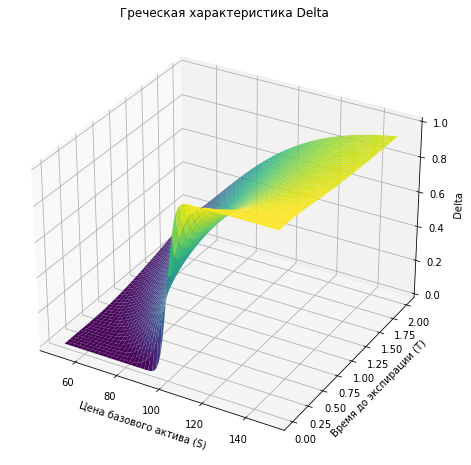

In [97]:
from mpl_toolkits.mplot3d import Axes3D

# График 3D поверхности для греческих характеристик
T_data = np.linspace(0.01, 2, 100)
S_data = np.linspace(50, 150, 100)
S, T = np.meshgrid(S_data, T_data)

# Вычисление значений для Delta (можно заменить на другие характеристики)
Z = np.array([[delta(s, K, t, sigma, r, q) for s in S_data] for t in T_data])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(S, T, Z, cmap='viridis')

ax.set_xlabel('Цена базового актива (S)')
ax.set_ylabel('Время до экспирации (T)')
ax.set_zlabel('Delta')
plt.title('Греческая характеристика Delta')
plt.show()


# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

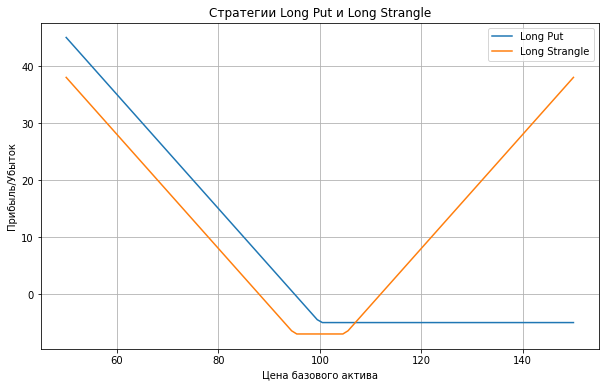

In [98]:
# Стратегия Long Put (покупка опциона пут)
def long_put_payoff(S, K, premium):
    return np.maximum(K - S, 0) - premium

# Стратегия Long Strangle (покупка пут и колл опционов с разными страйками)
def long_strangle_payoff(S, K1, K2, premium1, premium2):
    return np.maximum(K1 - S, 0) + np.maximum(S - K2, 0) - (premium1 + premium2)

# Графики для опционных стратегий
S_range = np.linspace(50, 150, 100)
long_put_premium = 5  # Пример премии за пут
strangle_premium = 7  # Пример премии за стрэнгл

long_put = long_put_payoff(S_range, 100, long_put_premium)
long_strangle = long_strangle_payoff(S_range, 95, 105, 3, 4)

plt.figure(figsize=(10, 6))
plt.plot(S_range, long_put, label="Long Put")
plt.plot(S_range, long_strangle, label="Long Strangle")
plt.title("Стратегии Long Put и Long Strangle")
plt.xlabel("Цена базового актива")
plt.ylabel("Прибыль/Убыток")
plt.grid(True)
plt.legend()
plt.show()


## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $$
X=\{X_c, X_p\},
$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In [99]:
import pandas as pd
from scipy.optimize import linprog

In [100]:
# Пример данных о опционах
data = {
    'Strike Price': [95, 100, 105, 110, 115],
    'Bid': [2.5, 3.0, 1.8, 1.2, 0.8],
    'Ask': [3.0, 3.5, 2.1, 1.5, 1.0],
    'Type': ['call', 'call', 'put', 'put', 'call'],
    'Volume': [200, 300, 150, 180, 220]
}

df = pd.DataFrame(data)
print(df)


   Strike Price  Bid  Ask  Type  Volume
0            95  2.5  3.0  call     200
1           100  3.0  3.5  call     300
2           105  1.8  2.1   put     150
3           110  1.2  1.5   put     180
4           115  0.8  1.0  call     220


In [101]:
# Параметры стратегии
S0 = 100  # Текущая цена базового актива
max_loss_pct = 0.1  # Максимальный убыток, 10% от стоимости базового актива
capital = 100000  # Начальная стоимость портфеля (капитал)
L = max_loss_pct * S0 * capital  # Максимальный убыток в денежном выражении

# Ограничения на количество контрактов
L_contracts = -5  # Минимальное количество контрактов (покупка или продажа)
U_contracts = 10  # Максимальное количество контрактов (покупка или продажа)

# Построение коэффициентов для линейной оптимизации
c = []  # Целевая функция (прибыль/убыток)
bounds = []  # Ограничения на количество контрактов

for i, row in df.iterrows():
    if row['Type'] == 'call':
        c.append(row['Ask'])  # Для покупки опциона колл берем ask
    else:
        c.append(-row['Bid'])  # Для продажи опциона пут берем bid (отрицательное значение)

    bounds.append((L_contracts, U_contracts))  # Ограничение на количество контрактов

# Ограничения по убытку
A = np.zeros((1, len(df)))  # Коэффициенты для ограничения на убыток
b = np.array([L])  # Максимальный убыток

# Решение задачи линейного программирования
result = linprog(c, bounds=bounds, A_ub=A, b_ub=b, method='highs')

# Печать результатов
if result.success:
    print("Оптимальный набор контрактов:", result.x)
    print("Общая прибыль/убыток:", result.fun)
else:
    print("Не удалось найти оптимальное решение")


Оптимальный набор контрактов: [-5. -5. 10. 10. -5.]
Общая прибыль/убыток: -67.5


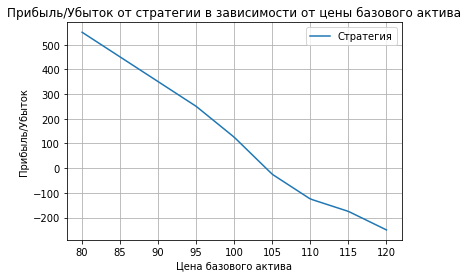

In [102]:
# График зависимости прибыли/убытка от цены базового актива
S_range = np.linspace(80, 120, 100)
payoffs = np.zeros(len(S_range))

for i, price in enumerate(S_range):
    payoff = 0
    for j, row in df.iterrows():
        if row['Type'] == 'call':
            payoff += np.maximum(price - row['Strike Price'], 0) * result.x[j]
        else:
            payoff += np.maximum(row['Strike Price'] - price, 0) * result.x[j]
    payoffs[i] = payoff

plt.plot(S_range, payoffs, label="Стратегия")
plt.title("Прибыль/Убыток от стратегии в зависимости от цены базового актива")
plt.xlabel("Цена базового актива")
plt.ylabel("Прибыль/Убыток")
plt.grid(True)
plt.legend()
plt.show()
